In [130]:
import pandas as pd

In [131]:
df = pd.read_csv("Downloads/Real estate.csv")

In [132]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [133]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [134]:
df = df.drop(['No'],axis=1)

In [135]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


<IPython.core.display.Javascript object>

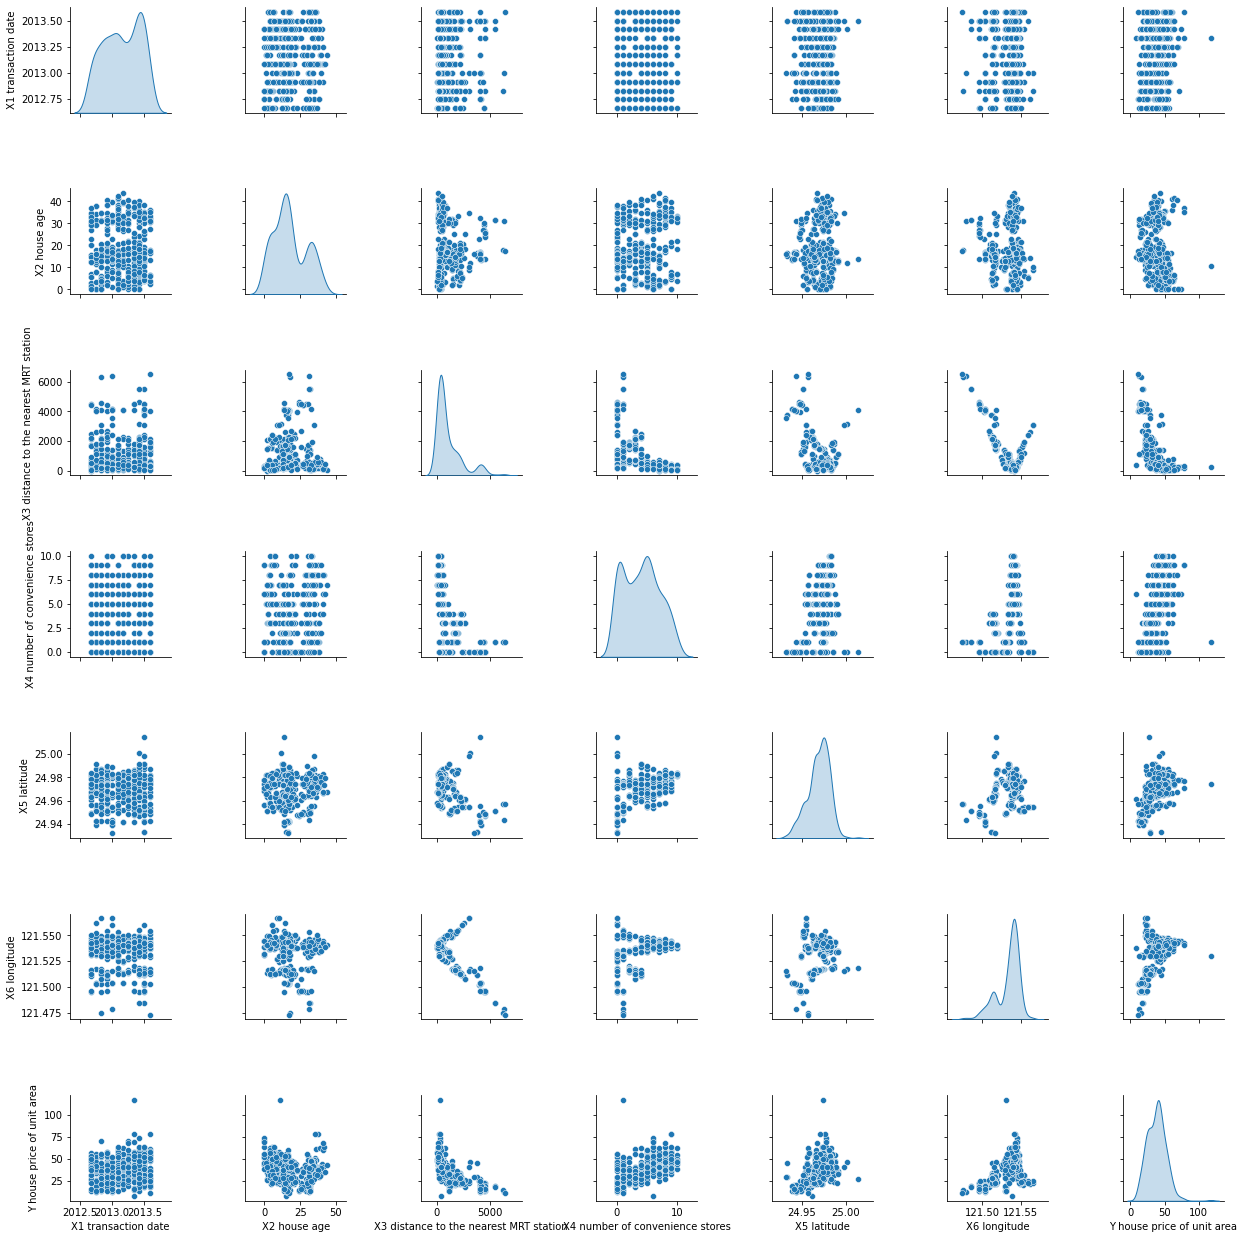

In [137]:
sns.pairplot(df,diag_kind='kde')

<IPython.core.display.Javascript object>

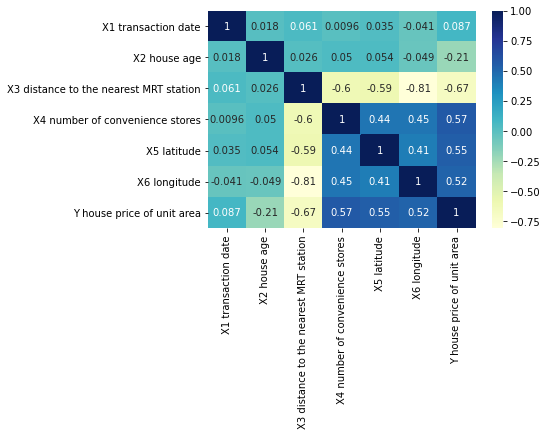

In [138]:
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')

<IPython.core.display.Javascript object>

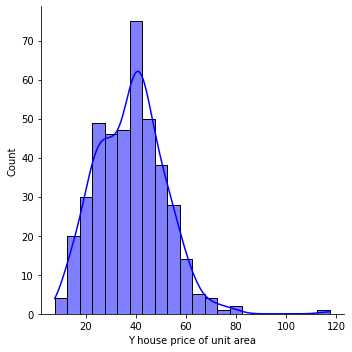

In [139]:
sns.displot(data= df, x='Y house price of unit area', kde=True , color='b')

In [140]:
X=df.drop('Y house price of unit area',axis=1)
y=df['Y house price of unit area']

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train , x_test , y_train , y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [144]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coeficient'])

,Coeficient
X1 transaction date,5.440742
X2 house age,-0.270791
X3 distance to the nearest MRT station,-0.004759
X4 number of convenience stores,1.091425
X5 latitude,229.043054
X6 longitude,-29.492591


In [145]:
y_pred=lr.predict(x_test)
y_pred

array([47.88625422, 41.16404556, 44.27301439, 40.19761542, 27.51326511,
       45.10953115, 44.63293274, 46.36346234, 23.62063133, 54.33444894,
       34.07416461, 36.54533193, 37.55154254, 23.2794052 , 35.26614165,
       34.38327747, 43.35633504, 45.40740539, 30.07083159, 44.09191493,
        0.73505984, 34.99271686, 48.22735154, 45.48646485, 11.5995282 ,
       39.69783664, 12.71276251, 42.91282893, 34.93451401, 37.27964515,
       13.17842185, 40.12708486, 35.21883505, 27.71588924, 46.40090931,
       31.21941994, 50.90046891, 14.07339433, 49.05344276, 40.0538446 ,
       38.24588962, 40.63256441, 47.01634759, 37.65598977, 39.85801839,
       46.88588156, 43.7241343 , 20.94434531, 47.41546271, 45.40608841,
       48.33783579, 48.98845389, 42.27403852, 42.5841908 , 36.04088185,
       14.95491907, 36.61494629, 34.88196676, 28.33519081, 45.91188076,
       33.19268817, 32.18910095, 14.95491907,  8.86547927, 10.36079881,
       34.11119212, 28.48186875, 46.59826043, 32.96743316, 31.47

In [146]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)


pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

##RSME is always greater than or equal to MAE (RSME >= MAE). 
##The greater difference between them indicates greater variance in 
##individual errors in the sample.

,Metrics
MAE,5.305356
MSE,53.505619
RMSE,7.314754


In [147]:
test_residuals=y_test-y_pred
pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'test_residuals':y_test-y_pred})

,y_test,y_pred,test_residuals
358,45.1,47.886254,-2.786254
350,42.3,41.164046,1.135954
373,52.2,44.273014,7.926986
399,37.3,40.197615,-2.897615
369,22.8,27.513265,-4.713265
...,...,...,...
31,25.0,40.368699,-15.368699
283,23.5,33.091396,-9.591396
157,35.6,42.327834,-6.727834
203,46.1,43.353985,2.746015


In [148]:
from sklearn.metrics import r2_score
R2 = metrics.r2_score(y_test,y_pred)
print(R2)

0.6810580555095651


In [149]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [150]:
df1

,Actual,Predicted
358,45.1,47.886254
350,42.3,41.164046
373,52.2,44.273014
399,37.3,40.197615
369,22.8,27.513265
...,...,...
31,25.0,40.368699
283,23.5,33.091396
157,35.6,42.327834
203,46.1,43.353985


In [151]:
print(' residual sum of squares is : '+ str(np.sum(np.square(df1['Predicted'] - df1['Actual']))))

 residual sum of squares is : 4440.966387334081


In [152]:
import numpy as np
mean = np.mean(y_test)
print('Total Sum of Squares is :'+str(np.sum(np.square(mean - df1['Actual']))))

Total Sum of Squares is :13924.058795180725


In [153]:
print('Regression Sum of squares :'+str(np.sum(np.square(df1['Predicted'] - mean))))

Regression Sum of squares :10130.073234515916


In [154]:
## if my Total sum of squares > residuals sum of squares = My model is good
## if my R2 score is near to 1 shows that my model is very good
